## Gas Sensor Array Drift - Pré-processamento

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt

### Leitura dos Dados

In [2]:
list_features = []
list_targets = []
for i in range(1, 11):
    X, y = load_svmlight_file(f='../Dataset/batch' + str(i) + '.dat', dtype=np.float64)
    X = pd.DataFrame(X.toarray())
    y = pd.Series(y)
    
    list_features.append(X)
    list_targets.append(y)
    
X = pd.concat(list_features, ignore_index=True)
y = pd.concat(list_targets, ignore_index=True)

In [3]:
print(X.shape)
X.head()

(13910, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


## Mudança de escala dos dados com Min Max (-1 a 1)

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.905872,-0.997343,-0.971612,-0.975257,-0.984879,0.958387,0.795490,0.865034,-0.878662,-0.998106,...,0.757627,0.941052,-0.784112,-0.854664,-0.967450,-0.995176,-0.986399,0.964157,0.763942,0.947373
1,-0.874435,-0.996351,-0.935227,-0.942549,-0.984585,0.928190,0.775693,0.862033,-0.845751,-0.997632,...,0.746861,0.945275,-0.762410,-0.840881,-0.939320,-0.989122,-0.981219,0.941361,0.751117,0.951699
2,-0.828754,-0.994975,-0.901866,-0.907260,-0.976629,0.883323,0.746385,0.856738,-0.792863,-0.996824,...,0.726840,0.941742,-0.729302,-0.791153,-0.912999,-0.983409,-0.970060,0.911878,0.730715,0.948836
3,-0.826652,-0.994980,-0.854993,-0.856440,-0.919666,0.880565,0.744694,0.857085,-0.789712,-0.996811,...,0.721628,0.940969,-0.724868,-0.786506,-0.877101,-0.976055,-0.959714,0.905411,0.726073,0.948164
4,-0.782066,-0.993870,-0.862880,-0.861308,-0.964463,0.831314,0.713546,0.852045,-0.737248,-0.996058,...,0.698484,0.936418,-0.686562,-0.711911,-0.876364,-0.974309,-0.956094,0.872440,0.702171,0.940519


## PCA

### Análise de componentes principais com os principais atributos a serem analisados

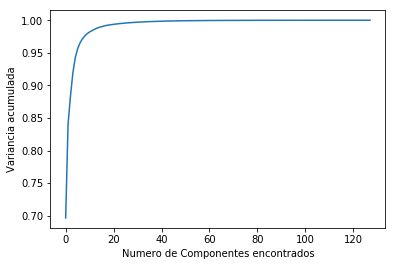

In [6]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de Componentes encontrados')
plt.ylabel('Variancia acumulada')
plt.show()

In [32]:
X_pca = PCA(0.995).fit_transform(X) # PCA(30) com 1/4 das features
X_pca = pd.DataFrame(X_pca)

In [33]:
print(X_pca.shape)
X_pca.head()

(13910, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.339565,0.198422,-0.173254,0.216613,0.267055,-0.025103,0.052416,0.050608,0.013126,0.033547,...,0.034453,-0.010479,-0.012610,0.009465,-0.021592,-0.004638,-0.030612,-0.011887,0.005407,-0.013931
1,-2.108847,0.266302,-0.109280,0.187270,0.257059,-0.014747,0.098163,0.050763,0.001345,0.027209,...,0.036366,-0.021087,-0.013838,0.004090,-0.021254,0.005225,-0.029929,-0.019965,0.005615,-0.013531
2,-1.806437,0.367635,-0.018661,0.181458,0.279032,0.000210,0.154078,0.055977,-0.009243,0.007621,...,0.031933,-0.020187,-0.016115,0.010839,-0.024313,0.016647,-0.034519,-0.020696,0.005584,-0.008265
3,-1.654477,0.411155,-0.005173,0.081328,0.289931,0.096692,0.115238,0.016243,-0.017247,0.052043,...,0.021131,0.025173,-0.037209,0.014851,-0.053815,0.012752,-0.050745,0.003469,0.023550,-0.018602
4,-1.404309,0.475124,0.112300,0.192767,0.322900,0.032027,0.222424,0.070189,-0.015679,-0.016262,...,0.034527,-0.011380,-0.021772,0.011944,-0.029566,0.037283,-0.038960,-0.025040,0.010058,-0.000281


## Exportar dados

In [27]:
y.name = 'target'
dataset = pd.concat([X, y], axis=1)
dataset.to_csv('../Dataset/dataset.csv', index=False)

In [34]:
y.name = 'target'
dataset_pca = pd.concat([X_pca, y], axis=1)
dataset_pca.to_csv('../Dataset/dataset_pca.csv', index=False)